In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy as scp


### exponential

Disk speed, disk storage and host power
 

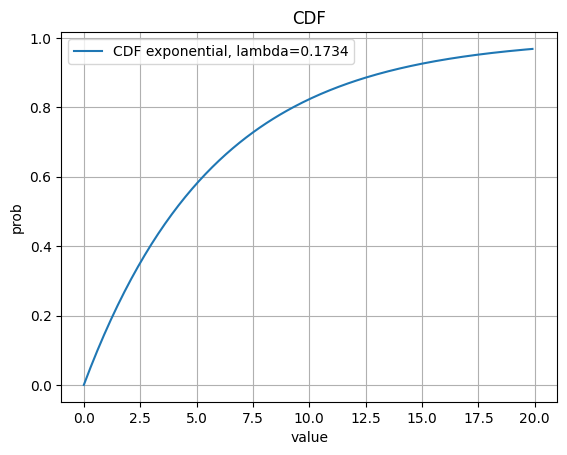

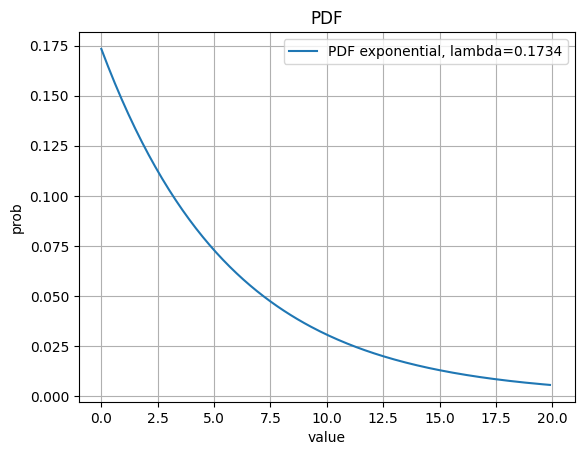

In [50]:

# the smaller lambda, the more variating and bigger values are
p_lambda = 0.1734

def add_exponential_cdf(_lambda, right_bound=40.0):
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return 1 - pow(math.e, - _lambda * x)
    plt.plot(ox, list(map(f, ox)), label=f'CDF exponential, lambda={_lambda}')


def add_exponential_pdf(_lambda, right_bound=40.0):
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return _lambda * pow(math.e, - _lambda * x)
    plt.plot(ox, list(map(f, ox)), label=f'PDF exponential, lambda={_lambda}')


##### CDF #####
plt.figure()
plt.grid(True)
add_exponential_cdf(p_lambda, 20.0)
plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=21.0)


plt.title('CDF')
plt.legend()

plt.show()


##### PDF #####
plt.figure()
plt.grid(True)

add_exponential_pdf(p_lambda, 20.0)

plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=21.0)
plt.title('PDF')
plt.legend()

plt.show()

### Weibull

time-to-failure

encountered in Availability fit distribution in default parameters.xml
and in Cluster3 availability in SETI article

in article p_k = 0.431, p_lambda = 1.682
 
 according to wiki (https://en.wikipedia.org/wiki/Weibull_distribution) k < 1 means that all failing hosts fail early and remaining ones live longer

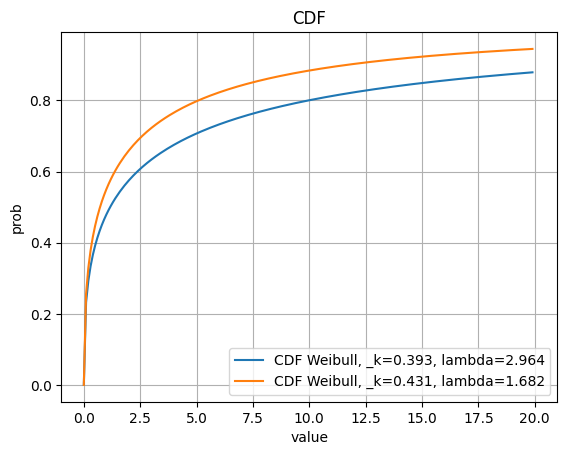

/tmp/ipykernel_76937/420522755.py:13: RuntimeWarning: divide by zero encountered in scalar power
  def f(x): return _k / _lambda * pow(x / _lambda, _k - 1) * pow(math.e, - pow(x / _lambda, _k))


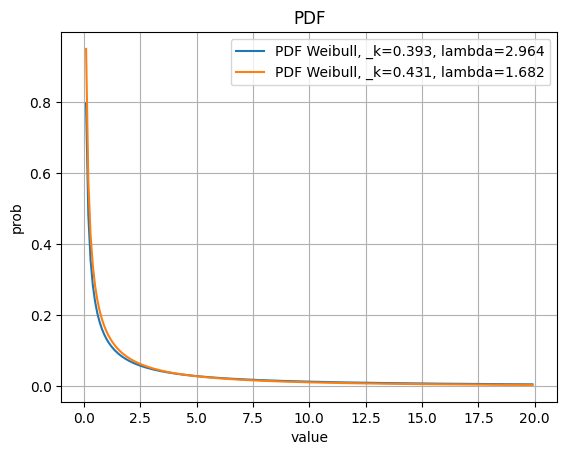

In [51]:

p_k = 0.393
# the bigger lambda, the more variating and bigger values are
p_lambda = 2.964

def add_weibull_cdf(_k, _lambda, right_bound=40.0):
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return 1 - pow(math.e, - pow(x / _lambda, _k))
    plt.plot(ox, list(map(f, ox)), label=f'CDF Weibull, _k={_k}, lambda={_lambda}')


def add_weibull_pdf(_k, _lambda, right_bound=40.0):
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return _k / _lambda * pow(x / _lambda, _k - 1) * pow(math.e, - pow(x / _lambda, _k))
    plt.plot(ox, list(map(f, ox)), label=f'PDF Weibull, _k={_k}, lambda={_lambda}')


##### CDF #####
plt.figure()
plt.grid(True)
add_weibull_cdf(0.393, 2.964, 20.0)
add_weibull_cdf(0.431, 1.682, 20.0)

plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=21.0)


plt.title('CDF')
plt.legend()

plt.show()


##### PDF #####
plt.figure()
plt.grid(True)
add_weibull_pdf(0.393, 2.964, 20.0)
add_weibull_pdf(0.431, 1.682, 20.0)
plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=21.0)


plt.title('PDF')
plt.legend()

plt.show()

### Gamma

encountered in availability in Seti article's clusters a lot

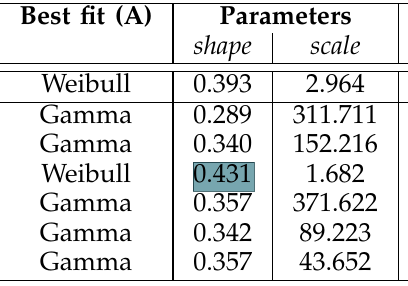

looks as weilbull logic. Fail rate decrease over the time if k<1

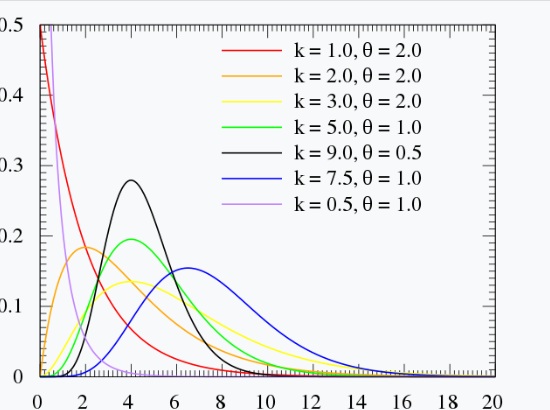

wiki (https://en.wikipedia.org/wiki/Gamma_distribution):

The parameterization with k and θ appears to be more common in econometrics and other applied fields, where the gamma distribution is frequently used to model waiting times. For instance, in life testing, the waiting time until death is a random variable that is frequently modeled with a gamma distribution.

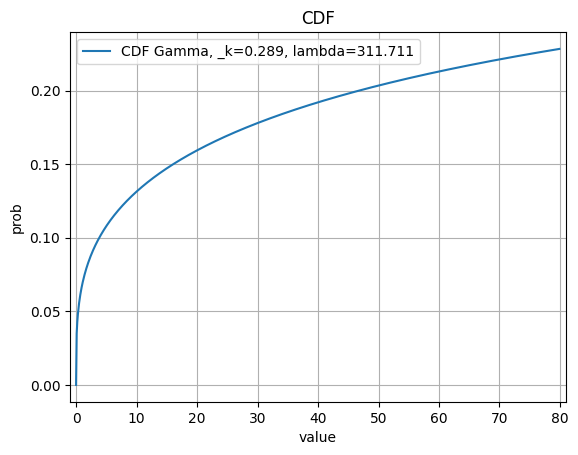

/tmp/ipykernel_76937/1800819738.py:15: RuntimeWarning: divide by zero encountered in scalar power
  def f(x): return 1 / gamma(_k) / pow(_lambda, _k) * pow(x, _k - 1) * pow(math.e, - x / _lambda)


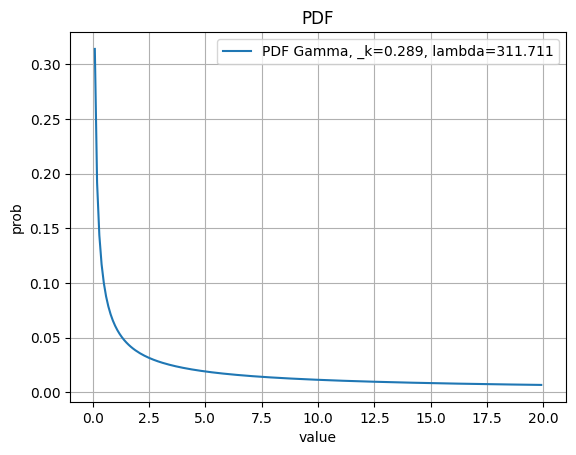

In [52]:
from scipy.special import gamma, gammainc


p_k = 0.289 
p_lambda = 311.711

def add_gamma_cdf(_k, _lambda, right_bound=40.0):
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return 1 / gamma(_k) * gammainc(_k, x / _lambda)
    plt.plot(ox, list(map(f, ox)), label=f'CDF Gamma, _k={_k}, lambda={_lambda}')


def add_gamma_pdf(_k, _lambda, right_bound=40.0):
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return 1 / gamma(_k) / pow(_lambda, _k) * pow(x, _k - 1) * pow(math.e, - x / _lambda)
    plt.plot(ox, list(map(f, ox)), label=f'PDF Gamma, _k={_k}, lambda={_lambda}')


##### CDF #####
plt.figure()
plt.grid(True)
add_gamma_cdf(p_k, p_lambda, 80.0)
plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=81.0)
plt.title('CDF')
plt.legend()

plt.show()


##### PDF #####
plt.figure()
plt.grid(True)
add_gamma_pdf(p_k, p_lambda, 20.0)

plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=21.0)


plt.title('PDF')
plt.legend()

plt.show()

### log_normal

met in Non-availability in default parameters.xml and in Non-availability in Seti clusters in overall

###  Hyper-exponential
met in Non-availability in clusters in Seti

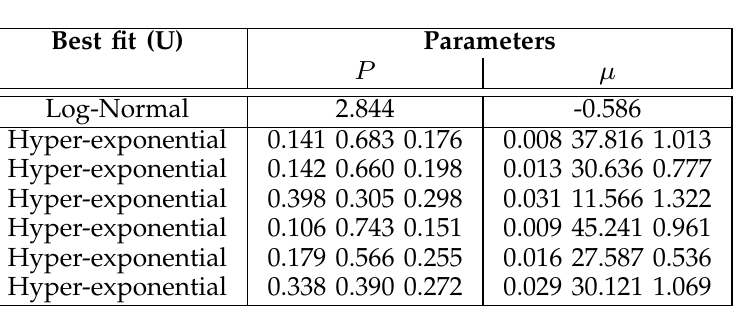

I saw no reason why they choose this three-phase hyper-exponential distribution (maybe except that it has more parameters and can approximate data better than just single exponential?) or maybe I've missed this part of the article.

upd: in https://sites.cs.ucsb.edu/~rich/publications/europar05.pdf authors refer to [25] who had used Hyperexponentials for availability

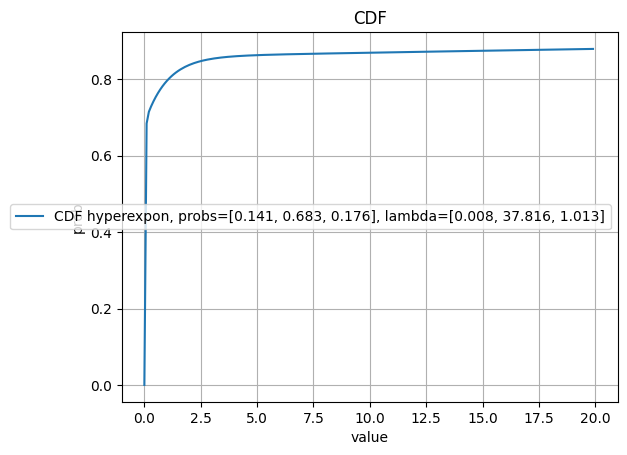

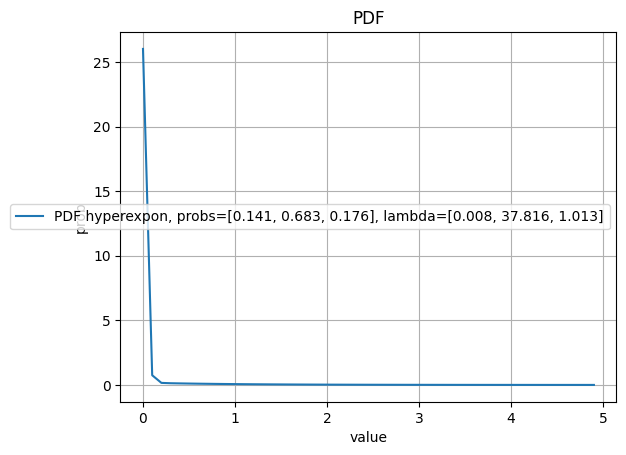

In [53]:

# the smaller lambda, the more variating and bigger values are
p_probs = [ 0.141, 0.683, 0.176]
p_lambdas = [ 0.008, 37.816, 1.013]

def add_hyperexpon_cdf(_probs, _lambdas, right_bound=40.0):
    cdf_one = lambda _lambda, x: 1 - pow(math.e, - _lambda * x)
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return sum([_probs[i] * cdf_one(_lambdas[i], x) for i in range(len(_lambdas))])
    plt.plot(ox, list(map(f, ox)), label=f'CDF hyperexpon, probs={_probs}, lambda={_lambdas}')


def add_hyperexpon_pdf(_probs, _lambdas, right_bound=40.0):
    pdf_one = lambda _lambda, x: _lambda * pow(math.e, - _lambda * x)
    ox = np.arange(0.0, right_bound, 0.1)
    def f(x): return sum([_probs[i] * pdf_one(_lambdas[i], x) for i in range(len(_lambdas))])
    plt.plot(ox, list(map(f, ox)), label=f'PDF hyperexpon, probs={_probs}, lambda={_lambdas}')



##### CDF #####
plt.figure()
plt.grid(True)
add_hyperexpon_cdf(p_probs, p_lambdas, 20.0)
plt.xlabel('value')
plt.ylabel('prob')
# plt.ylim(-0.5, 1.0)
plt.xlim(left=-1.0, right=21.0)
plt.title('CDF')
plt.legend()

plt.show()


##### PDF #####
plt.figure()
plt.grid(True)
add_hyperexpon_pdf(p_probs, p_lambdas, 5.0)
plt.xlabel('value')
plt.ylabel('prob')
plt.title('PDF')
plt.legend()

plt.show()

### real data estimation

In [75]:
df = pd.read_csv("/home/ksenia/vsc/mirror_combos/Files/log_save.log", header=None, names=['val'])

df

,val
0,3.51
1,1.85
2,11.76
3,1.15
4,1.17
...,...
8805,11.92
8806,15.99
8807,2.62
8808,7.76


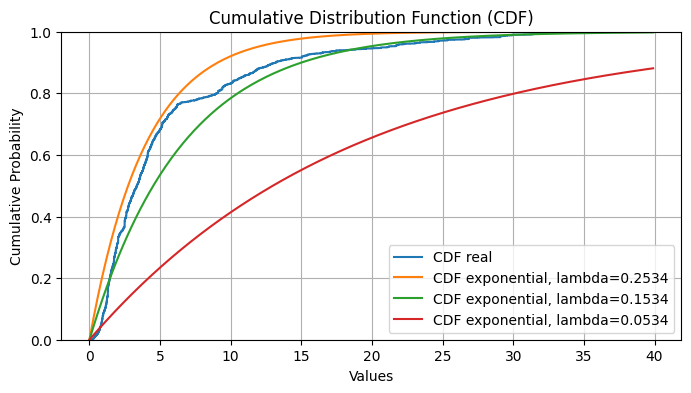

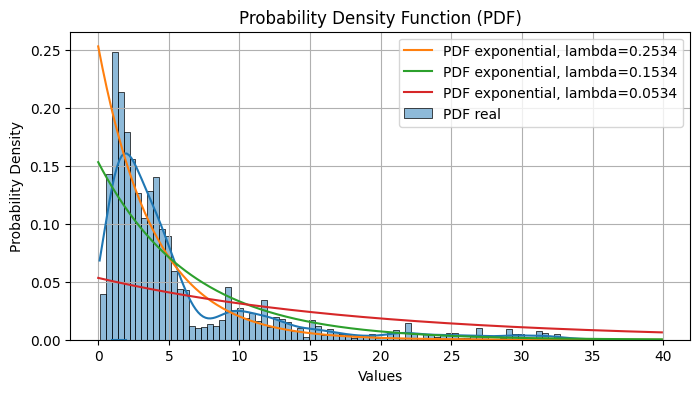

In [76]:
p_lambdas_for_expon = [0.2534, 0.1534, 0.0534]

# Extract values from the DataFrame column
data = df['val']
loud = np.percentile(data, 99)
# print(len(data))
data = list(filter(lambda x: x < loud, data))
# print(len(data))

# Plot CDF
plt.figure(figsize=(8, 4))
sns.ecdfplot(data, label='CDF real')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
list(map(add_exponential_cdf, p_lambdas_for_expon))
plt.grid(True)
plt.legend()
plt.show()

# Plot PDF
plt.figure(figsize=(8, 4))
sns.histplot(data, kde=True, label='PDF real',
             stat='density', common_norm=False)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF)')
plt.plot([1, 2], [0, 0])
list(map(add_exponential_pdf, p_lambdas_for_expon))
plt.legend()
plt.grid(True)
plt.show()


### compare with different host powers

In [77]:
data_fl = pd.read_csv("/home/ksenia/vsc/mirror_combos/result_for_diff_power.csv")
data_fl.head()

,expr,FLOPS
0,lam=0.2534,166
1,lam=0.2534,184
2,lam=0.2534,166
3,lam=0.2534,142
4,lam=0.2534,157


<Axes: xlabel='expr', ylabel='FLOPS'>

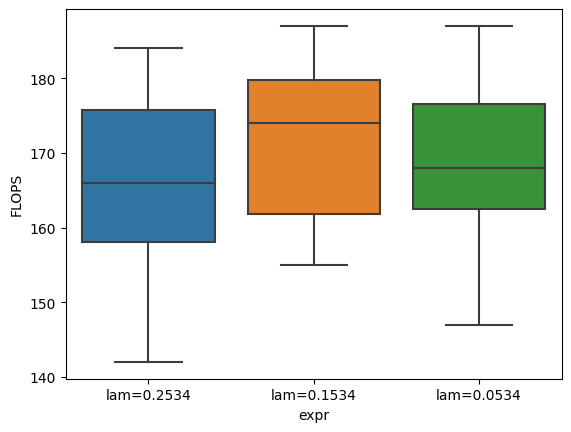

In [78]:
sns.boxplot(data=data_fl, x="source", y="FLOPS")

<Axes: xlabel='expr', ylabel='FLOPS'>

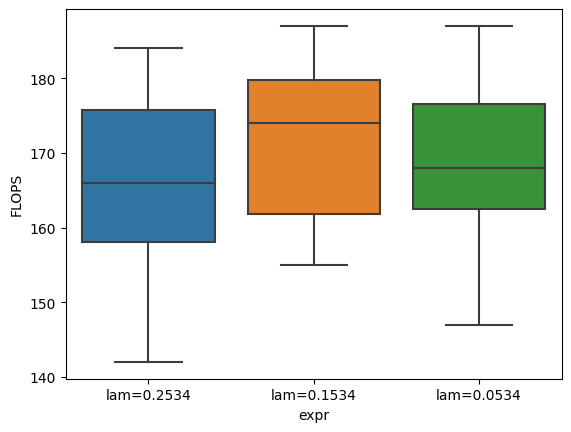

In [79]:
data_fl1 = pd.read_csv("/home/ksenia/vsc/mirror_combos/result_for_diff_power.csv")
sns.boxplot(data=data_fl1, x="source", y="FLOPS")

<Axes: xlabel='expr', ylabel='FLOPS'>

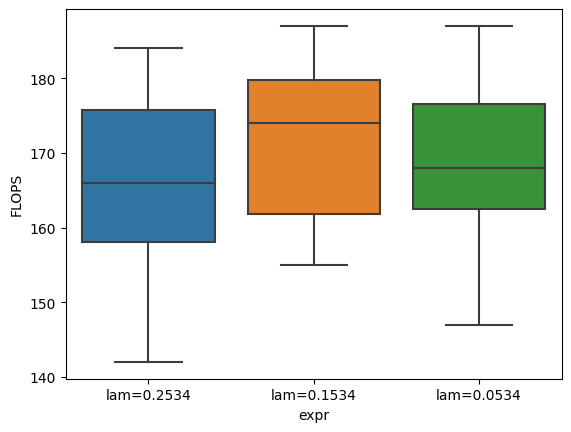

In [80]:
data_fl2 = pd.read_csv("/home/ksenia/vsc/mirror_combos/result_for_diff_power.csv")
sns.boxplot(data=data_fl2, x="source", y="FLOPS")

### Approx distribution

very raw code just in case I need to parametrize the system by distribution and I don't have one 

  params: FitParams(a=22.004017591812772, loc=-16.593759815107234, scale=1.0)
 success: True
 message: 'Optimization terminated successfully.'


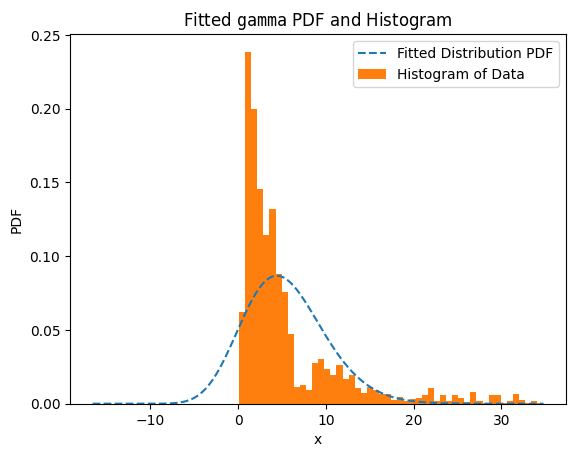

In [81]:
path_to_data = "/home/ksenia/vsc/mirror_combos/Files/log_save.log"
distribution = "gamma"


map_distribution_to_struct = {
    "norm": scp.stats.norm,
    "expon": scp.stats.expon,
    "weilbull": None,
    "gamma": scp.stats.gamma

}
df = pd.read_csv(path_to_data, header=None, names=['val'])

# Extract values from the DataFrame column
data = df['val']
loud = np.percentile(data, 99)
data = list(filter(lambda x: x < loud, data))


res = scp.stats.fit(map_distribution_to_struct[distribution], data, [(-100, 100), (-100, 100)])
print(res)

res.plot()
plt.show()

<Axes: xlabel='source', ylabel='FLOPS'>

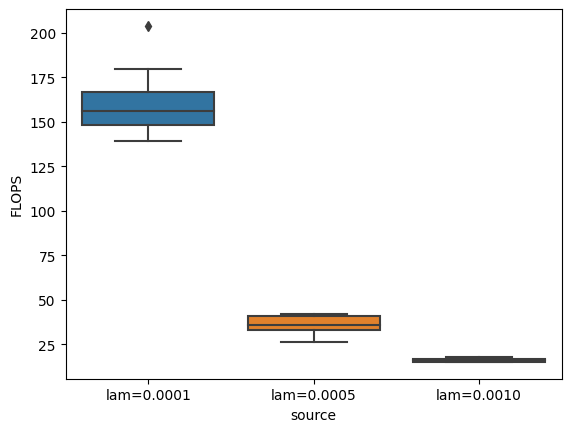

In [3]:
data_fl_mem = pd.read_csv("/home/ksenia/vsc/mirror_combos/result_for_diff_disk_cap.csv")
sns.boxplot(data=data_fl_mem, x="source", y="FLOPS")

<Axes: xlabel='source', ylabel='FLOPS'>

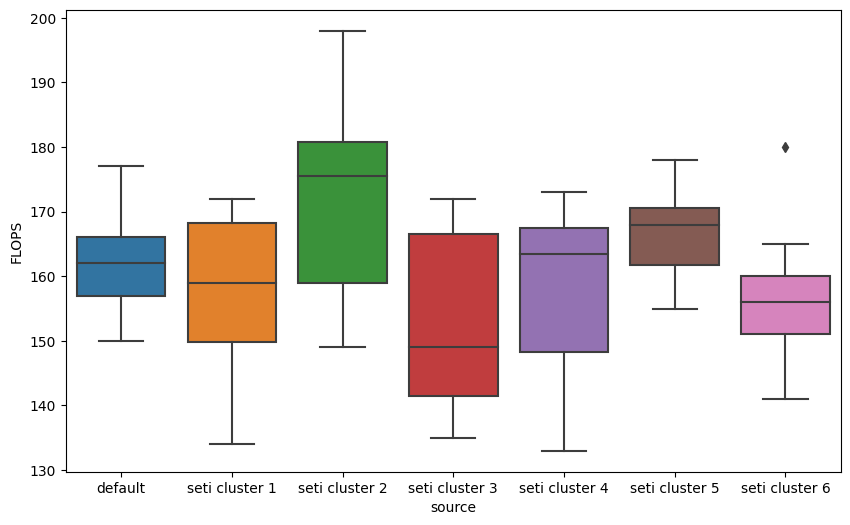

In [13]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 6))

data_fl_avail = pd.read_csv("/home/ksenia/vsc/mirror_combos/result_for_diff_availability.csv")
sns.boxplot(ax=ax, data=data_fl_avail, x="source", y="FLOPS")

In [36]:
results_timeline = pd.read_csv("/home/ksenia/vsc/mirror_combos/traces/cur_date_cur_time_time_devision.csv")
results_timeline.describe()

,redsult_id,workunit_id,BeforeSendBack,BeforeValidation,ChosenToSend,CreatedAt,MovedToClient,MovedToRunable,Ran,Stopped,Wait
count,251454.000000,251454.000000,251454.0,251454.000000,251454.000000,251454.000000,251454.000000,251454.000000,251454.00000,251454.000000,251454.000000
mean,0.500000,142335.179564,0.0,0.000182,2528.042377,95235.685502,0.153969,0.301318,1.27956,161.525786,1838.762813
std,0.500001,52793.156597,0.0,0.005525,16907.796816,66952.245273,66.980286,7.296197,49.33853,2725.784848,15188.130047
min,0.000000,0.000000,0.0,0.000000,0.000000,48.535000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,118854.250000,0.0,0.000000,0.000000,30482.225000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,150286.000000,0.0,0.000000,0.000000,89184.200000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,181717.750000,0.0,0.000000,0.000000,155220.750000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,213149.000000,0.0,0.330725,211514.000000,215987.000000,33587.300000,1186.940000,3591.32000,132450.000000,140400.000000


In [37]:
results_timeline.shape

(251454, 11)

In [38]:
def draw_stage(parameter):
    plt.figure()
    plt.grid(True)
    plt.xlabel('value')
    plt.ylabel('timfore before chosen to send')
    ox =range( results_timeline.shape[0])
    plt.plot(ox, results_timeline[parameter].sort_values(), 'o')
    plt.title(f'{parameter} distribution')
    plt.legend()

    plt.show()

    plt.hist(results_timeline[parameter], bins=50, alpha=0.5, label=f'new_ver')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


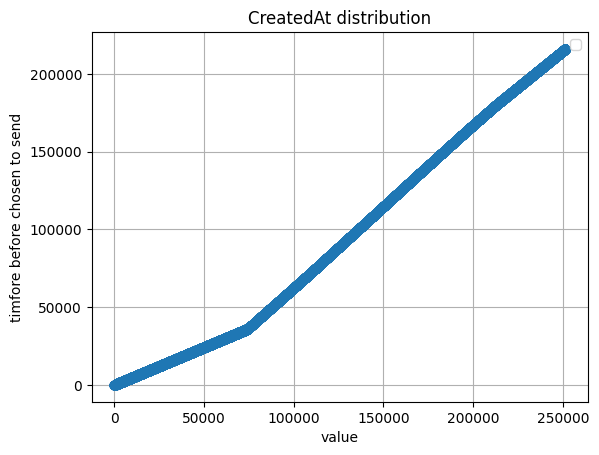

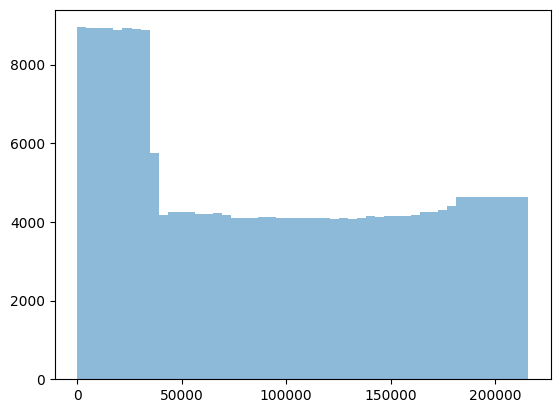

In [39]:
draw_stage("CreatedAt")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


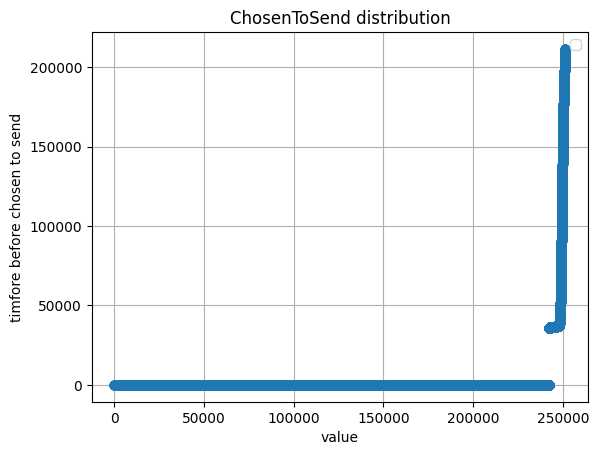

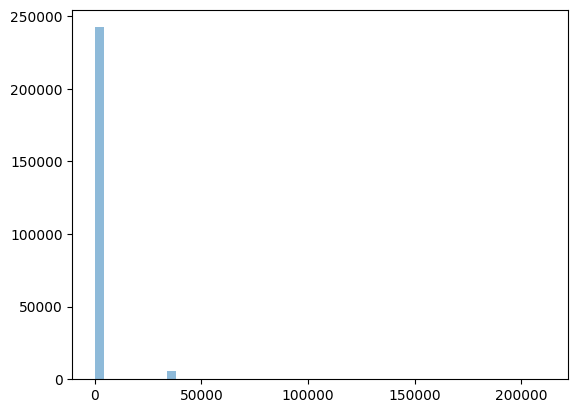

In [40]:
draw_stage("ChosenToSend")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


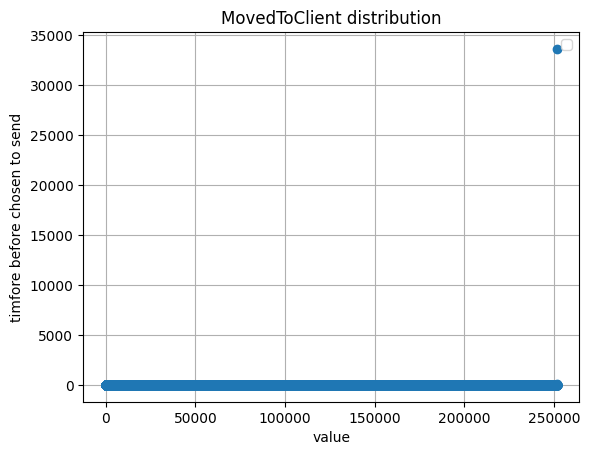

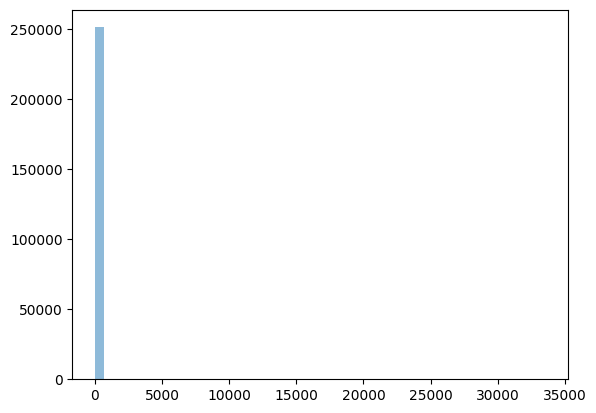

In [41]:
draw_stage("MovedToClient")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


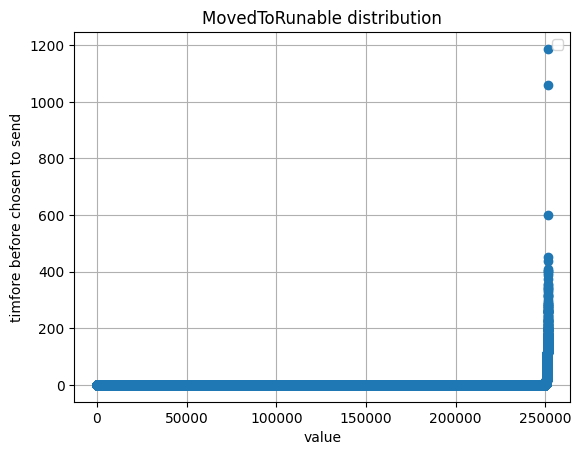

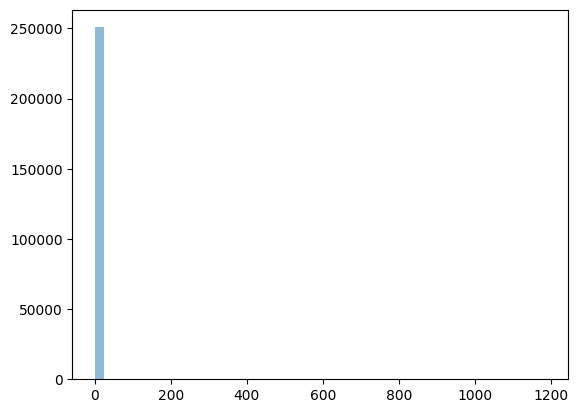

In [42]:
draw_stage("MovedToRunable")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


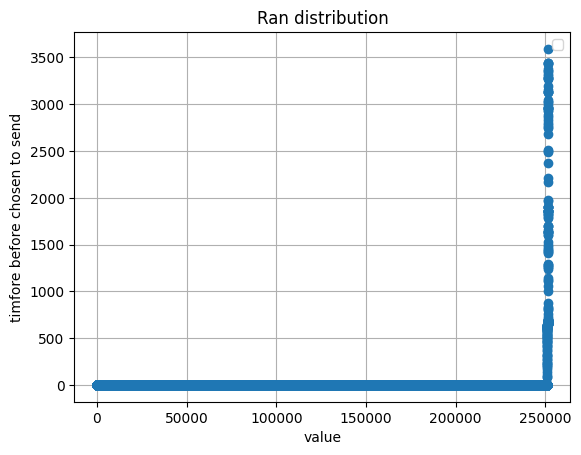

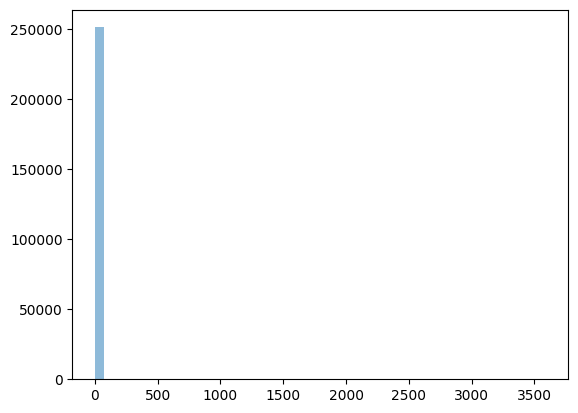

In [43]:
draw_stage("Ran")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


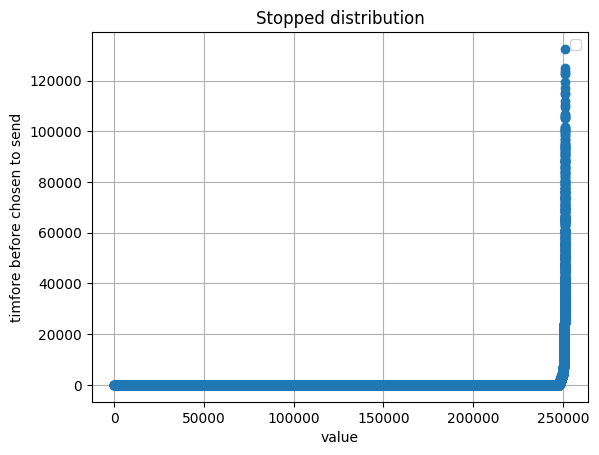

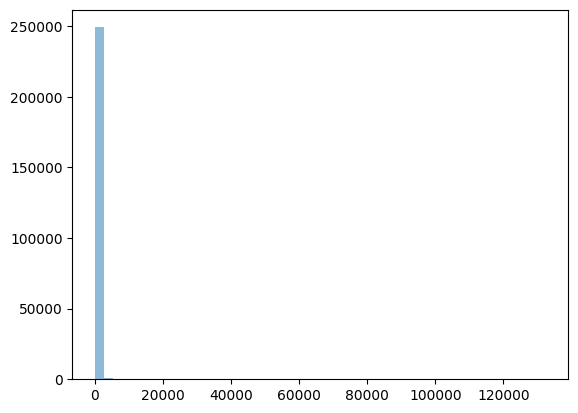

In [44]:
draw_stage("Stopped")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


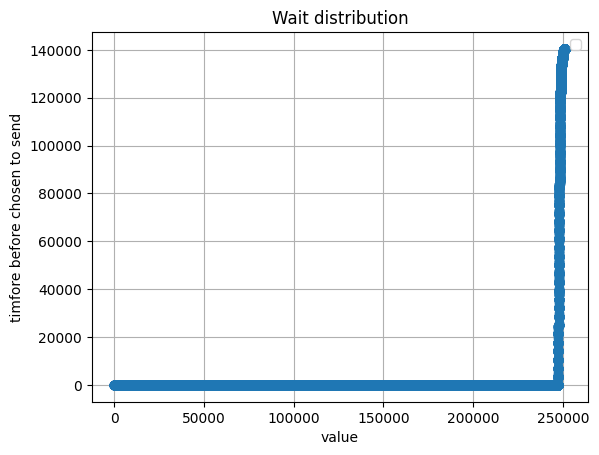

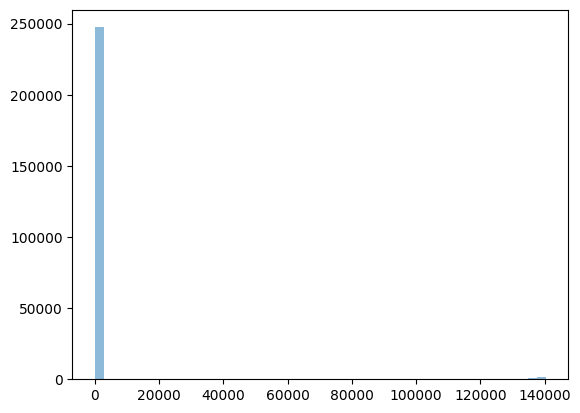

In [45]:
draw_stage("Wait")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


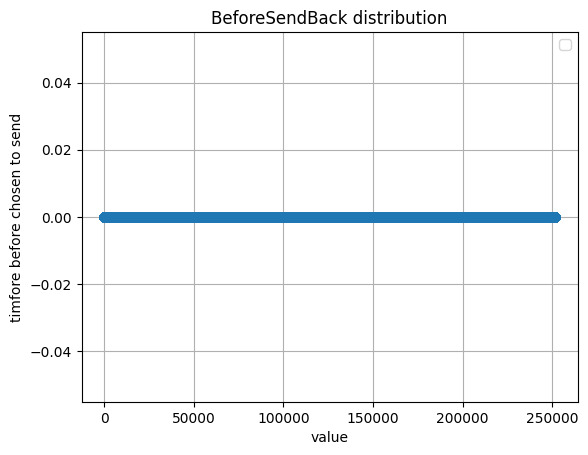

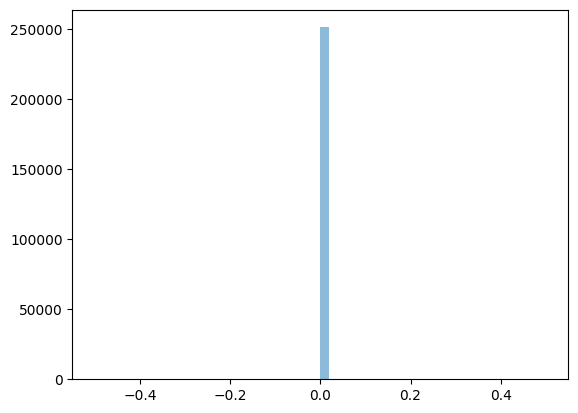

In [46]:
draw_stage("BeforeSendBack")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


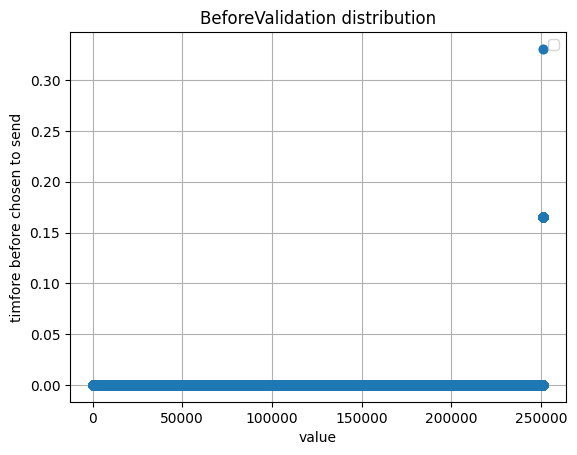

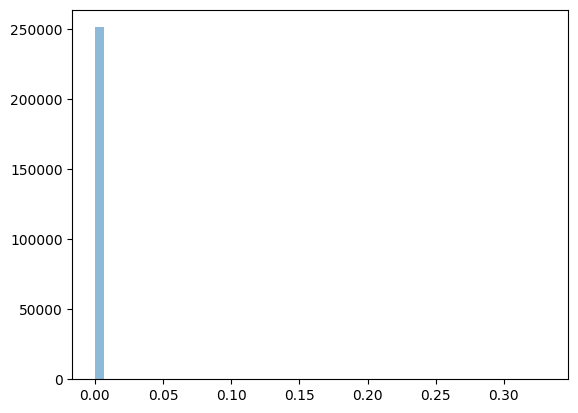

In [47]:
draw_stage("BeforeValidation")